<a href="https://colab.research.google.com/github/TraseRRR98/NYC-Taxi-Analysis-Lab/blob/main/Copy_of_DS_Skills_Lab_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Skills Lab

Materials:

- Download the January 2023 Yellow Taxi Data PARQUET file https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
- Download the Taxi Zone Lookup table CSV file on the same page
- Read the Yellow Taxi data dictionary https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

*Assignment:*

Use pandas to read the 2 data files into your Python notebook. Answer the following questions and upload your results here:

Tips: there are 3 airports, JFK, LaGuardia, and Newark (EWR)

1. Answer the following questions:

- How many pickups happened at each airport?
- How many dropoffs happened at each airport?
- What is the total amount of airport fees collected at each NYC airport? (JFK and LaGuardia)
- What borough destination had the most tips?
- What were the top 10 pickup locations by number of passengers?

2. Create a data visualization of your choice

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
taxi_link = (
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
)
zone_link = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"

trips = pd.read_parquet(taxi_link, engine="pyarrow")
taxi_zones = pd.read_csv(zone_link)

In [ ]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [ ]:
trips["tpep_pickup_datetime"].iloc[-1].day_of_week

1

In [ ]:
trips["pickup_day"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day)
trips["pickup_dow"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day_name())
trips["pickup_dow_num"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day_of_week)

In [ ]:
taxi_zones.head()
airport_list = [1, 132, 138]
airport_zones = taxi_zones.query("LocationID in @airport_list")

In [ ]:
# rows before 3066766
trips_merged_pu = trips.merge(
    taxi_zones, left_on=["PULocationID"], right_on=["LocationID"], how="inner"
)

In [ ]:
trips_merged_pu.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_dow,pickup_dow_num,LocationID,Borough,Zone,service_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,14.30,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
1,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,27.80,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
2,1,2023-01-01 00:52:06,2023-01-01 01:02:18,2.0,1.70,1.0,N,161,164,4,...,16.40,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
3,2,2023-01-01 00:19:12,2023-01-01 00:38:27,1.0,5.70,1.0,N,161,87,1,...,38.16,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
4,2,2023-01-01 00:18:08,2023-01-01 00:32:43,1.0,2.17,1.0,N,161,107,2,...,19.20,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone


In [ ]:
trips_merged_pu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
# 1 - How many pickups happened at each airport?
result_1 = (
    trips_merged_pu.query("PULocationID in @airport_list")
    .groupby(["Zone"])
    .agg({"Zone": "count", "passenger_count": "sum"})
)
result_1.columns = ["pickup_count", "passenger_count"]
result_1.reset_index(inplace=True)

In [ ]:
result_1

,Zone,pickup_count,passenger_count
0,JFK Airport,160030,228407.0
1,LaGuardia Airport,89188,119617.0
2,Newark Airport,410,648.0


<Axes: xlabel='Zone', ylabel='pickup_count'>

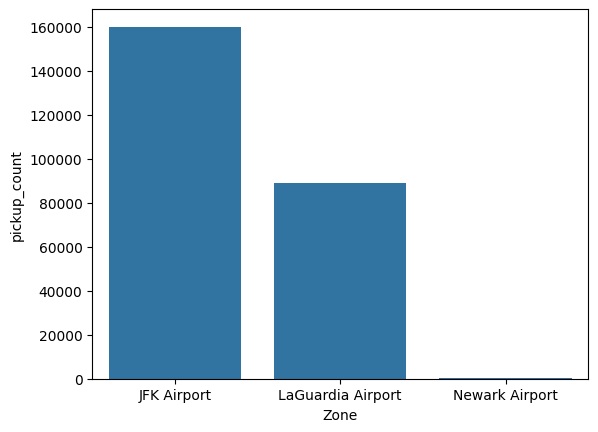

In [ ]:
sns.barplot(result_1, x="Zone", y="pickup_count")

In [ ]:
# 2 - How many dropoffs happened at each airport?
trips_merged_do = trips.merge(
    taxi_zones.query("LocationID in @airport_list"),
    left_on=["DOLocationID"],
    right_on=["LocationID"],
    how="inner",
)

In [ ]:
trips_merged_do.shape

(72747, 26)

In [ ]:
result_2 = trips_merged_do.groupby(["Zone"]).agg(
    {"Zone": "count", "passenger_count": "sum"}
)
result_2.columns = ["dropoff_count", "passenger_count"]
result_2.reset_index(inplace=True)

In [ ]:
result_2

,Zone,dropoff_count,passenger_count
0,JFK Airport,33190,49805.0
1,LaGuardia Airport,32031,42552.0
2,Newark Airport,7526,12156.0


<Axes: xlabel='Zone', ylabel='dropoff_count'>

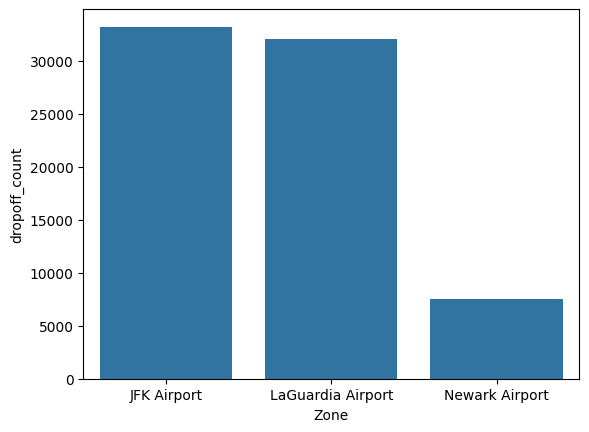

In [ ]:
sns.barplot(result_2, x="Zone", y="dropoff_count")

In [ ]:
# 3 - What is the total amount of airport fees collected at each NYC airport? (JFK and LaGuardia)
result_3 = (
    trips.query("PULocationID in @airport_list")
    .groupby("PULocationID")
    .agg({"airport_fee": "sum", "PULocationID": "count"})
)
result_3.columns = ["airport_fee_sum", "pickup_count"]
result_3.reset_index(inplace=True)

In [ ]:
result_3

,PULocationID,airport_fee_sum,pickup_count,LocationID,Borough,Zone,service_zone
0,132,187165.0,160030,132,Queens,JFK Airport,Airports
1,138,108615.0,89188,138,Queens,LaGuardia Airport,Airports


In [ ]:
# dropping bad EWR airport row
result_3.drop(0, axis=0, inplace=True)

In [ ]:
result_3 = result_3.merge(
    taxi_zones, left_on="PULocationID", right_on="LocationID", how="inner"
)

In [ ]:
trips.query("PULocationID == 1 and airport_fee > 0")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_dow,pickup_dow_num
261195,2,2023-01-04 14:49:22,2023-01-04 14:49:42,2.0,0.0,5.0,N,1,1,1,...,0.0,40.69,11.75,1.0,204.69,0.0,1.25,4,Wednesday,2
2559949,2,2023-01-27 15:15:51,2023-01-27 15:19:06,1.0,0.0,5.0,N,1,1,2,...,0.0,0.00,0.00,1.0,127.25,0.0,1.25,27,Friday,4


<Axes: xlabel='Zone', ylabel='airport_fee_sum'>

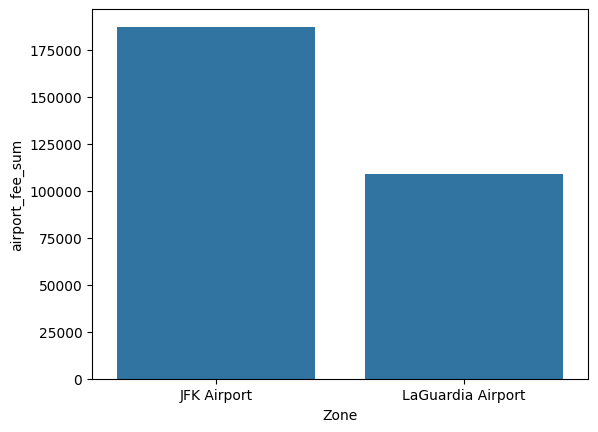

In [ ]:
sns.barplot(result_3, x="Zone", y="airport_fee_sum")

In [ ]:
# 4 - What borough destination had the most tips?

trips_merged_do_all = trips.merge(
    taxi_zones, left_on=["DOLocationID"], right_on=["LocationID"], how="left"
)

borough_metrics = (
    trips_merged_do_all.groupby("Borough")
    .agg(
        {
            "tip_amount": "sum",
            "DOLocationID": "count",
            "trip_distance": "mean",
        }
    )
    .reset_index()
    .sort_values()
)

In [ ]:
borough_metrics.head(6)

,Borough,tip_amount,DOLocationID,trip_distance
0,Bronx,61818.26,18313,10.332796
1,Brooklyn,704746.40,118902,9.061841
2,EWR,108362.21,7526,17.885436
3,Manhattan,8382541.67,2725880,3.189211
4,Queens,873584.81,161624,8.808632
5,Staten Island,5859.28,972,17.963426


In [ ]:
borough_metrics[["Borough", "tip_amount"]]

,Borough,tip_amount
0,Bronx,61818.26
1,Brooklyn,704746.40
2,EWR,108362.21
3,Manhattan,8382541.67
4,Queens,873584.81
5,Staten Island,5859.28
6,Unknown,76625.08


<Axes: xlabel='Borough', ylabel='tip_amount'>

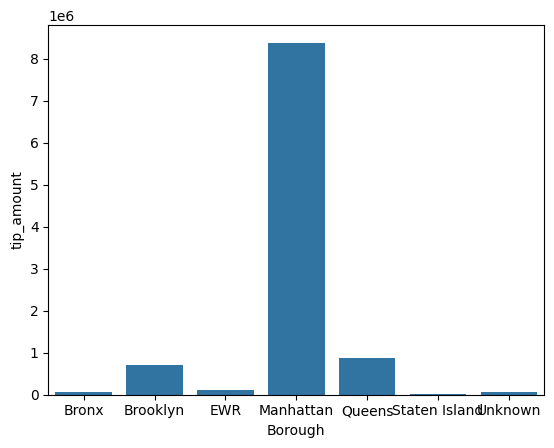

In [ ]:
sns.barplot(borough_metrics, x="Borough", y="tip_amount")

In [ ]:
trips_merged_pu.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_dow,pickup_dow_num,LocationID,Borough,Zone,service_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,14.30,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
1,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,27.80,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
2,1,2023-01-01 00:52:06,2023-01-01 01:02:18,2.0,1.70,1.0,N,161,164,4,...,16.40,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
3,2,2023-01-01 00:19:12,2023-01-01 00:38:27,1.0,5.70,1.0,N,161,87,1,...,38.16,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
4,2,2023-01-01 00:18:08,2023-01-01 00:32:43,1.0,2.17,1.0,N,161,107,2,...,19.20,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone


<Axes: xlabel='Borough', ylabel='tip_amount'>

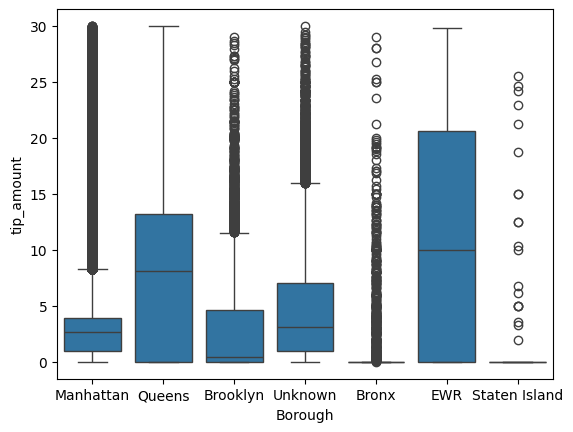

In [ ]:
sns.boxplot(
    trips_merged_pu.query("tip_amount < 30 and tip_amount >= 0"),
    x="Borough",
    y="tip_amount",
)

<Axes: xlabel='tip_amount', ylabel='Count'>

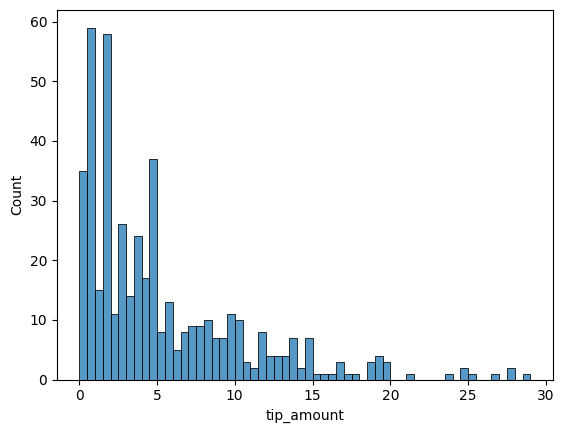

In [ ]:
sns.histplot(
    trips_merged_pu.query("tip_amount < 30 and tip_amount > 0 and Borough == 'Bronx'"),
    x="tip_amount",
    binwidth=0.5,
)

In [ ]:
# 5 - What were the top 10 pickup locations by number of passengers?
result_5 = pd.DataFrame(
    trips_merged_pu.groupby("Zone")["passenger_count"]
    .sum()
    .sort_values(ascending=False)[0:10]
).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'JFK Airport'),
  Text(1, 0, 'Upper East Side South'),
  Text(2, 0, 'Midtown Center'),
  Text(3, 0, 'Upper East Side North'),
  Text(4, 0, 'Penn Station/Madison Sq West'),
  Text(5, 0, 'Times Sq/Theatre District'),
  Text(6, 0, 'Midtown East'),
  Text(7, 0, 'Lincoln Square East'),
  Text(8, 0, 'LaGuardia Airport'),
  Text(9, 0, 'Upper West Side South')])

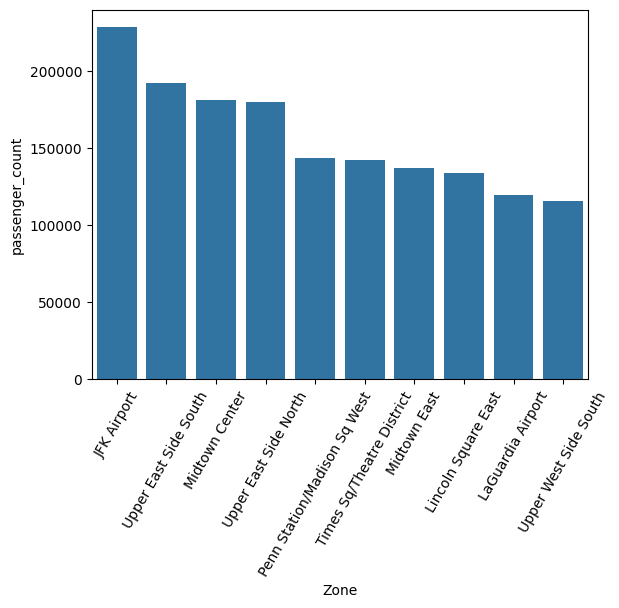

In [ ]:
sns.barplot(result_5, x="Zone", y="passenger_count")
plt.xticks(rotation=60)

In [ ]:
# My work with plots starts here!!!

newTaxiLink = ("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-03.parquet")
newTrips = pd.read_parquet(newTaxiLink, engine="pyarrow")

#trips.groupby("pickup_day").agg({"passenger_count": sum})

In [ ]:
newTrips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-03-01 00:18:51,2024-03-01 00:23:45,0.0,1.30,1.0,N,142,239,1,8.6,3.5,0.5,2.70,0.0,1.0,16.30,2.5,0.0
1,1,2024-03-01 00:26:00,2024-03-01 00:29:06,0.0,1.10,1.0,N,238,24,1,7.2,3.5,0.5,3.00,0.0,1.0,15.20,2.5,0.0
2,2,2024-03-01 00:09:22,2024-03-01 00:15:24,1.0,0.86,1.0,N,263,75,2,7.9,1.0,0.5,0.00,0.0,1.0,10.40,0.0,0.0
3,2,2024-03-01 00:33:45,2024-03-01 00:39:34,1.0,0.82,1.0,N,164,162,1,7.9,1.0,0.5,1.29,0.0,1.0,14.19,2.5,0.0
4,1,2024-03-01 00:05:43,2024-03-01 00:26:22,0.0,4.90,1.0,N,263,7,2,25.4,3.5,0.5,0.00,0.0,1.0,30.40,2.5,0.0


In [ ]:
taxi_zones.head()
bensonhurstList = [21,22]
bensonhurstZones = taxi_zones.query("LocationID in @bensonhurstList")

In [ ]:
tripsMergedPu = newTrips.merge(
    taxi_zones, left_on=["PULocationID"], right_on=["LocationID"], how="inner"
)

In [ ]:
tripsMergedPu.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,LocationID,Borough,Zone,service_zone
0,1,2024-03-01 00:18:51,2024-03-01 00:23:45,0.0,1.30,1.0,N,142,239,1,...,2.70,0.0,1.0,16.30,2.5,0.0,142,Manhattan,Lincoln Square East,Yellow Zone
1,2,2024-03-01 00:53:32,2024-03-01 01:08:18,1.0,4.05,1.0,N,142,116,1,...,4.96,0.0,1.0,29.76,2.5,0.0,142,Manhattan,Lincoln Square East,Yellow Zone
2,2,2024-03-01 00:17:35,2024-03-01 00:29:37,1.0,2.07,1.0,N,142,229,1,...,3.56,0.0,1.0,21.36,2.5,0.0,142,Manhattan,Lincoln Square East,Yellow Zone
3,2,2024-03-01 00:07:06,2024-03-01 00:19:35,1.0,3.58,1.0,N,142,152,2,...,0.00,0.0,1.0,22.70,2.5,0.0,142,Manhattan,Lincoln Square East,Yellow Zone
4,2,2024-03-01 00:09:04,2024-03-01 00:18:20,1.0,2.56,1.0,N,142,68,2,...,0.00,0.0,1.0,17.80,2.5,0.0,142,Manhattan,Lincoln Square East,Yellow Zone


In [ ]:
tripsMergedPu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582628 entries, 0 to 3582627
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [ ]:
# My plot will show how many pickups was happened in benshenhurst in March 2024

result = (
    tripsMergedPu.query("PULocationID in @bensonhurstList")
    .groupby(["Zone"])
    .agg({"Zone": "count", "passenger_count": "sum"})
)
result.columns = ["pickup_count", "passenger_count"]
result.reset_index(inplace=True)

In [ ]:
result

,Zone,pickup_count,passenger_count
0,Bensonhurst East,156,138.0
1,Bensonhurst West,232,201.0


<Axes: xlabel='Zone', ylabel='pickup_count'>

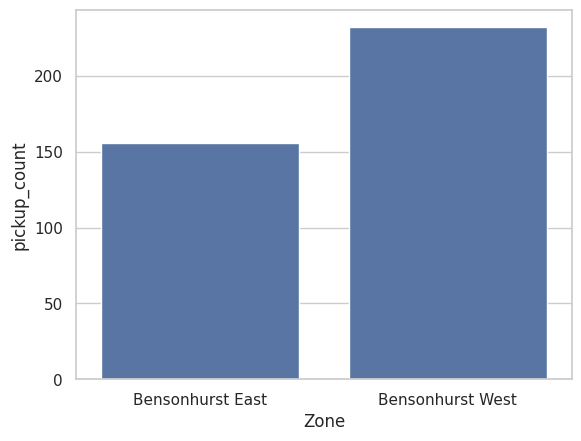

In [ ]:
sns.barplot(result, x="Zone", y="pickup_count")

In [ ]:
brooklynList = [10,13,16,20,21,24,25,28,32,33,34,35,36,38,39,48,51,53,54,60,61,62,64,65,66,70,71,75,76,79,84,88,90,96,105,107,110,111,122,132,148,149,153,154,164,176,177,180,189,194,209,216,221,224,226,227,254,255,256]
brooklynZones = taxi_zones.query("LocationID in @brooklynList")

In [ ]:
# Next I want to see how many drop offs was in brooklyn in each zone

result2 = (
    tripsMergedPu.query("PULocationID in @brooklynList")
    .groupby(["Zone"])
    .agg({"Zone": "count", "passenger_count": "sum"})
)
result2.columns = ["pickup_count", "passenger_count"]
result2.reset_index(inplace=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, 'Baisley Park'),
  Text(1, 0, 'Battery Park City'),
  Text(2, 0, 'Bayside'),
  Text(3, 0, 'Belmont'),
  Text(4, 0, 'Bensonhurst East'),
  Text(5, 0, 'Bloomingdale'),
  Text(6, 0, 'Boerum Hill'),
  Text(7, 0, 'Briarwood/Jamaica Hills'),
  Text(8, 0, 'Bronxdale'),
  Text(9, 0, 'Brooklyn Heights'),
  Text(10, 0, 'Brooklyn Navy Yard'),
  Text(11, 0, 'Brownsville'),
  Text(12, 0, 'Bushwick North'),
  Text(13, 0, 'Cambria Heights'),
  Text(14, 0, 'Canarsie'),
  Text(15, 0, 'Clinton East'),
  Text(16, 0, 'Co-Op City'),
  Text(17, 0, 'College Point'),
  Text(18, 0, 'Columbia Street'),
  Text(19, 0, 'Crotona Park East'),
  Text(20, 0, 'Crown Heights North

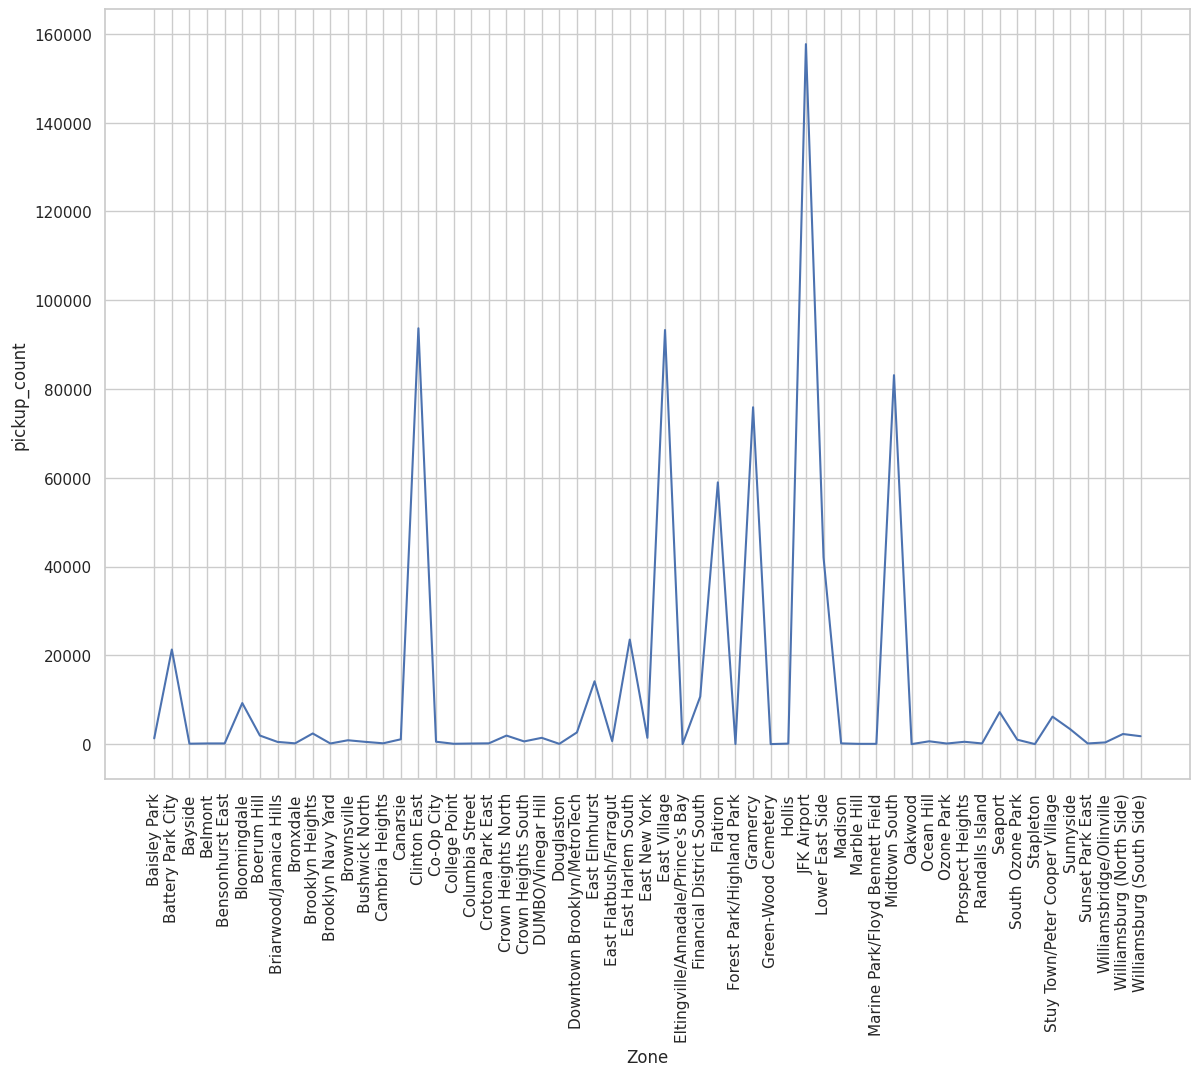

In [ ]:
plt.figure(figsize=(14, 10))

sns.lineplot(result2, x="Zone", y="pickup_count")
plt.xticks(rotation=90)
